In [149]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
plt.rc('font', family='Malgun Gothic')


c:\Users\LJH\miniconda3\envs\regression\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


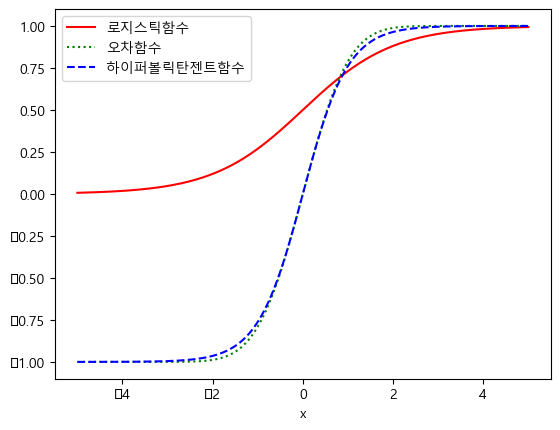

In [150]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="로지스틱함수")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="오차함수")
plt.plot(xx, np.tanh(xx), 'b--', label="하이퍼볼릭탄젠트함수")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

c:\Users\LJH\miniconda3\envs\regression\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


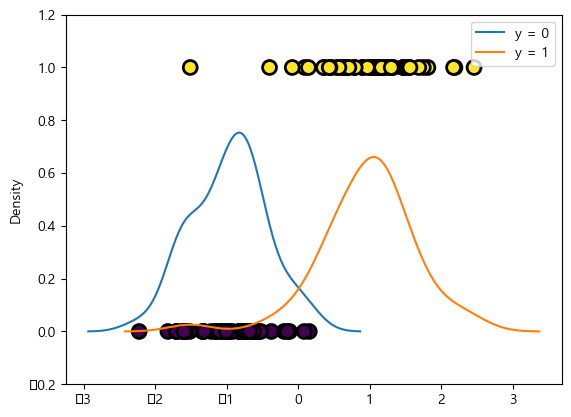

In [151]:
from sklearn.datasets import make_classification
import seaborn as sns

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
# sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
# sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
sns.kdeplot(X0[y == 0, :].flatten(), label="y = 0") # 확률 밀도 함수수
sns.kdeplot(X0[y == 1, :].flatten(), label="y = 1")

plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()

In [152]:
import statsmodels.api as sm

X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Feb 2025   Pseudo R-squ.:                  0.7679
Time:                        13:58:10   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


In [288]:
preds=np.linspace(0,1,100)
labels=np.linspace(0,1,100)
result = np.log(preds)
result = np.log(preds)*labels - (1-labels)*np.log(1-preds)
result.shape

C:\Users\LJH\AppData\Local\Temp\ipykernel_13280\2328553600.py:3: RuntimeWarning: divide by zero encountered in log
  result = np.log(preds)
C:\Users\LJH\AppData\Local\Temp\ipykernel_13280\2328553600.py:4: RuntimeWarning: divide by zero encountered in log
  result = np.log(preds)*labels - (1-labels)*np.log(1-preds)
C:\Users\LJH\AppData\Local\Temp\ipykernel_13280\2328553600.py:4: RuntimeWarning: invalid value encountered in multiply
  result = np.log(preds)*labels - (1-labels)*np.log(1-preds)


(100,)

In [259]:
logistic_weights = np.array(np.random.randn(2))
logistic_weights.shape

(2,)

In [153]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
import numpy as np

In [154]:
iris=load_iris()

In [226]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [155]:
idx = np.in1d(iris.target, [0,2])

C:\Users\LJH\AppData\Local\Temp\ipykernel_13280\3100392609.py:1: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  idx = np.in1d(iris.target, [0,2])


In [156]:
idx.shape

(150,)

In [157]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [248]:
x = iris.data[idx,0:2][1].reshape(2,1)
x.shape

(2, 1)

In [250]:
iris.data.shape

(150, 4)

In [223]:
x = iris.data[idx,0:2]
y = iris.target[idx]

x

array([[5.1, 3.5],
       [5.4, 3.4],
       [5. , 3.5],
       [5. , 2. ]])

In [161]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [162]:
model = Perceptron(max_iter=100, eta0=0.1, random_state=1).fit(x, y)

In [163]:
x_sepal_length_min, x_sepal_length_max = x[:,0].min()-1, x[:,0].max()+1
x_sepal_width_min, x_sepal_width_max = x[:,1].min()-1, x[:,1].max()+1

In [164]:
xx, yy = np.meshgrid(np.linspace(x_sepal_length_min, x_sepal_length_max, 1000),
            np.linspace(x_sepal_width_min, x_sepal_width_max, 1000))

In [165]:
xx[0][0]

np.float64(3.3)

In [166]:
xx.ravel()[0]

np.float64(3.3)

In [167]:
zz = model.predict(np.c_[xx.ravel(), yy.ravel()])

In [255]:
type(zz)

numpy.ndarray

In [169]:
zz = zz.reshape(xx.shape)

In [170]:
zz.shape

(1000, 1000)

In [254]:
zz

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

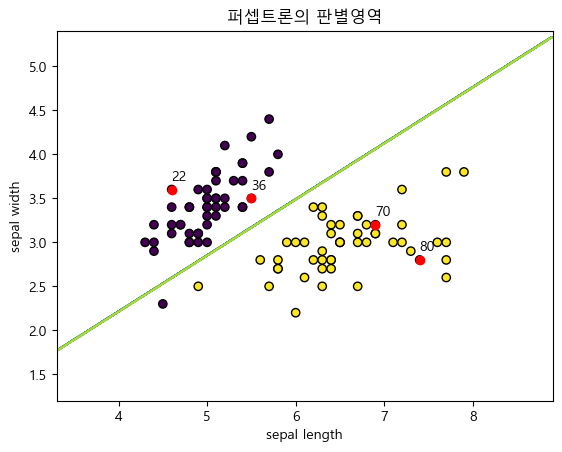

In [171]:
plt.contour(xx, yy, zz)
plt.scatter(x[:,0], x[:,1], c=y,edgecolors='k')

idx = [22, 36, 70, 80]
plt.scatter(x[idx, 0], x[idx, 1], c='r')
for i in idx:
    plt.annotate(i, xy=(x[i, 0], x[i, 1] + 0.1))
plt.grid(False)
plt.title("퍼셉트론의 판별영역")

plt.xlabel("sepal length")
plt.ylabel("sepal width")

plt.show()

<BarContainer object of 4 artists>

c:\Users\LJH\miniconda3\envs\regression\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\LJH\miniconda3\envs\regression\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


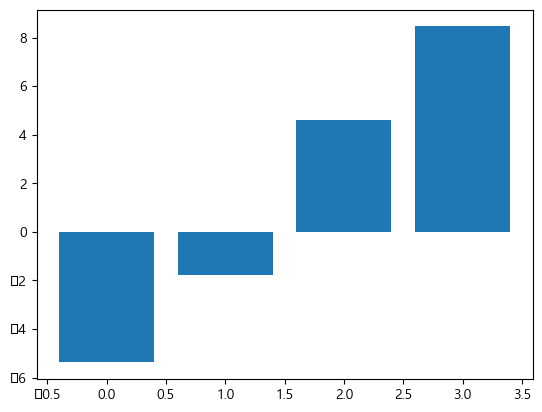

In [172]:
plt.bar(range(len(idx)), model.decision_function(x[idx]))

In [173]:
model.decision_function(x[idx])
# decision_function : 결정 함수. 결정 경계와의 거리를 반환하는 함수수

array([-5.374, -1.77 ,  4.609,  8.454])

In [174]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

In [175]:
iris=load_iris()

In [176]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [177]:
iris.feature_names[:2]

['sepal length (cm)', 'sepal width (cm)']

In [178]:
x = iris.data[:,:2]
y = iris.target

x.shape

(150, 2)

In [179]:
idx = np.logical_or(iris.target==0, iris.target==1)

idx.shape

(150,)

In [180]:
x = iris.data[idx, :3]

In [181]:
x.shape

(100, 3)

In [182]:
y = y[idx]

In [183]:
y.shape

(100,)

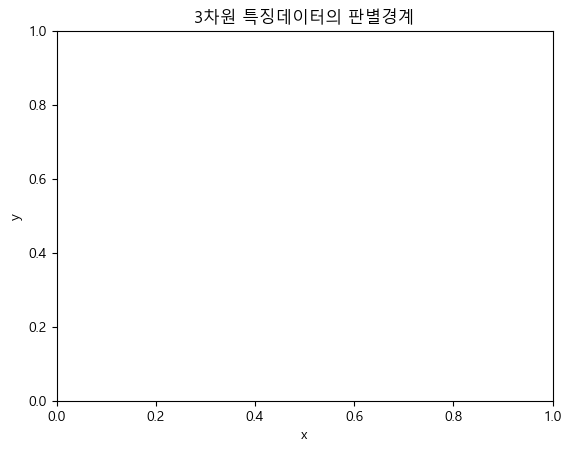

In [184]:
import matplotlib as mpl
fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=10)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, marker='o', s=100, cmap=mpl.cm.jet)
ax.plot_surface(np.array([[4, 4], [7, 7]]), np.array([[2, 4.5], [2, 4.5]]),
                np.array([[2, 4], [2, 4]]), color='g', alpha=.3)
plt.title("3차원 특징데이터의 판별경계")
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("z")
plt.show()

In [185]:
from sklearn import svm

In [186]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                    np.linspace(-3, 3, 500))

In [187]:
xx

array([[-3.        , -2.98797595, -2.9759519 , ...,  2.9759519 ,
         2.98797595,  3.        ],
       [-3.        , -2.98797595, -2.9759519 , ...,  2.9759519 ,
         2.98797595,  3.        ],
       [-3.        , -2.98797595, -2.9759519 , ...,  2.9759519 ,
         2.98797595,  3.        ],
       ...,
       [-3.        , -2.98797595, -2.9759519 , ...,  2.9759519 ,
         2.98797595,  3.        ],
       [-3.        , -2.98797595, -2.9759519 , ...,  2.9759519 ,
         2.98797595,  3.        ],
       [-3.        , -2.98797595, -2.9759519 , ...,  2.9759519 ,
         2.98797595,  3.        ]])

In [191]:
np.random.seed(0)

In [192]:
x = np.random.randn(300,2)
y = np.logical_xor(x[:,0]>0, x[:,1]>0)

In [197]:
model = svm.NuSVC()
model.fit(x, y)

NuSVC()

In [200]:
data = np.c_[xx.ravel(), yy.ravel()]
z = model.decision_function(data)
z = z.reshape(xx.shape)

c:\Users\LJH\miniconda3\envs\regression\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


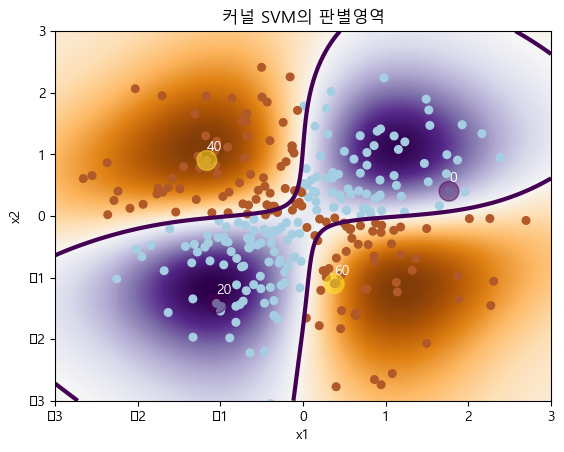

In [204]:

plt.imshow(z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, z, levels=[0], linewidths=3)
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(x[idx, 0], x[idx, 1], c=y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(x[i, 0], x[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("커널 SVM의 판별영역")
plt.show()

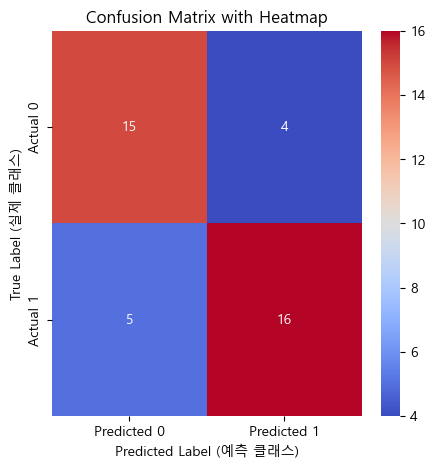

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# 1️⃣ 데이터 생성 (이진 분류)
X, y = make_classification(n_samples=200,
                           n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2, random_state=42)

# 2️⃣ 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 3️⃣ SVM 모델 학습
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# # 4️⃣ 예측 수행
y_pred = model.predict(X_test)

# # 5️⃣ 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 2️⃣ 히트맵 시각화
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

# 3️⃣ 축 제목 추가
plt.xlabel("Predicted Label (예측 클래스)")
plt.ylabel("True Label (실제 클래스)")
plt.title("Confusion Matrix with Heatmap")
plt.show()


In [217]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)


array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [219]:
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [221]:
y_true = [0, 0, 1, 1, 2, 2, 2]
y_pred = [0, 0, 1, 1, 2, 2, 2]
# y_pred = [0, 0, 1, 2, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         2
     class 1       1.00      1.00      1.00         2
     class 2       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [ ]:
from sklearn.metrics import roc_curve
import numpy as np

# 실제 값 (y_test)
y_true = np.array([1, 1, 1, 0, 0, 0])

# 모델의 확률 예측 값 (예: predict_proba()[:,1])
y_scores = np.array([0.95, 0.80, 0.65, 0.40, 0.30, 0.10])
#                   [1,    1,    1,    0,    0,    0]
# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# 결과 출력
print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)


FPR: [0. 0. 0. 1.]
TPR: [0.         0.33333333 1.         1.        ]
Thresholds: [ inf 0.95 0.65 0.1 ]
